WORK BY ALEKSANDAR YORDANOV AND TORBEN GUIJARRO 

# Laboratory #2_2 : Corner detection and ORB

At the end of this laboratory, you would get familiarized with

*   Corner Detection using FAST and Harris Corners
*   ORB feature detectors and descriptors

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

In [ ]:
# mount drive to the notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
import os
from skimage import color, data, feature, filters, io, transform 

# Corner Detection

### Exercise: #1

*    Detect the corners in the image starbucks4.jpg. Use corner_fast to extract FAST corners for the given image and corner_peaks to find corners in the corner measure response image.
*   Show the original image, fast corners, peaks overlayed on the original image using matplotlib subplot.



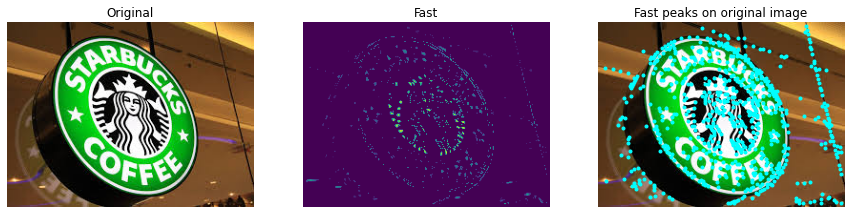

In [ ]:
# solution
starbucks4 = io.imread("/content/drive/MyDrive/CV/CV_lab5/P05_18_oct_2022_corner_detection_and_ORB/images/starbucks/starbucks4.jpg")
gray_starbucks4 = color.rgb2gray(starbucks4)
fast = feature.corner_fast(gray_starbucks4,threshold=0.05) #original threshold is 0.15
peak = feature.corner_peaks(fast)

# Plotting
fig, axs = plt.subplots(1,3, figsize=(15,15))
axs[0].imshow(starbucks4)
axs[1].imshow(fast)
axs[2].imshow(starbucks4)
axs[2].scatter(peak[:,1], peak[:,0], color='cyan', marker='.')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title("Original")
axs[1].set_title("Fast")
axs[2].set_title("Fast peaks on original image")


plt.show()


*   Analyze and discuss the effect of changing **'threshold'** in the corner_fast function.

**Solution**

The threshold is used to decide whether the pixels around the test pixel are brighter or darker. The lower the threshold, the more corners will appear. [1](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.corner_fast)



*   Repeat the exercise by replacing FAST corners with Harris corners.

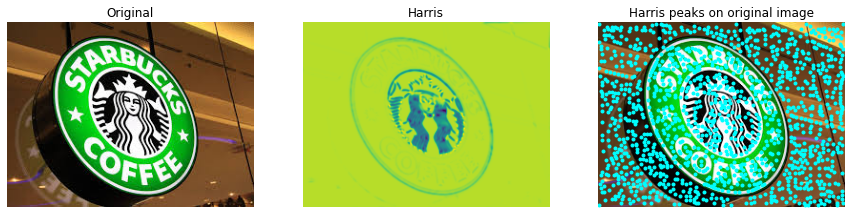

In [ ]:
# solution
harris = feature.corner_harris(gray_starbucks4, k=0.2) # k: Sensitivity factor to separate corners from edges, typically in range [0, 0.2]
harris_peak = feature.corner_peaks(harris)

# Plotting
fig, axs = plt.subplots(1,3, figsize=(15,15))
axs[0].imshow(starbucks4)
axs[1].imshow(harris)
axs[2].imshow(starbucks4)
axs[2].scatter(harris_peak[:,1], harris_peak[:,0], color='cyan', marker='.')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title("Original")
axs[1].set_title("Harris")
axs[2].set_title("Harris peaks on original image")

plt.show()


*   Do you find difference between both the techniques? If so, why and what difference do you observe?


**FAST algorithm**: computes a 16 pixels Bresenham circle around each pixel and checks whether the pixels around it have an intensity above or below a specified threshold. If at least three of the four surrounding pixels (at 0-360, 90, 180, 270 degrees) values are above or below the intensity of the central pixel, then the pixel is a corner. To validate this, it checks that at least 12 (of 16) contiguous pixels fall in the criterion (this parameter can be modified). 

**Limitations**: FAST does not detect corners that are perfectly aligned to the *x-axes* and *y-axes*. Since it needs a ring of dark or light pixels around the center that includes both edges of the corner, crips images do not work well. This could be improved by applying blur, using a Gaussian filter for example. [2](https://medium.com/data-breach/introduction-to-fast-features-from-accelerated-segment-test-4ed33dde6d65)

****
**HARRIS algorigthm**: Harris algorithm takes a small window and computes the difference (SSD) of the pixel values before and after shifting the window by a small step. By computing eigenvalues it can determine the largest and smalled increases in SSD. For this, it can determine flat regions, edges and corners. [3](https://medium.com/data-breach/introduction-to-harris-corner-detector-32a88850b3f6), [4](https://www.cse.psu.edu/~rtc12/CSE486/lecture06.pdf)

****
**Solution**

Yes, there is a difference between both techniques. Harris algorithm is more sentitive and detects more corners and edges than the FAST algorithm. 

# ORB feature detector and binary descriptor

### Exercise #0: Compute ORB descriptors and find descriptors match

*   Load 'astronaut' image from data module.
*   Convert the image to grayscale.
*   Create a copy of the image and rotate it by 180&deg; 



In [ ]:
img1 = color.rgb2gray(data.astronaut())
img2 = transform.rotate(img1, 180)

*   Create an ORB feature detector with default parameters. *Hint: ORB feature detector is available in skimage.feature module.*



In [ ]:
descriptor_extractor = feature.ORB(n_keypoints=200)

*   Extract the keypoints and descriptors using detect_and_extract function for both the images

In [ ]:
descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

*   Descriptors can be matched using match_descriptors function available in skimage.feature module
*   The matches can be plotted using the plot_matches function available in skimage.feature module

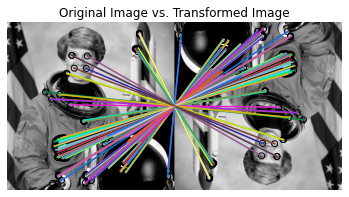

In [ ]:
matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)

## Plotting the matches
#plt.figure(figsize=(10,10))
feature.plot_matches(plt, img1, img2, keypoints1, keypoints2, matches12)
plt.axis('off')
plt.title("Original Image vs. Transformed Image")
plt.show()

### Exercise: #1

*   Analyze and discuss the effect of changing the parameter **'max_ratio'** in the match_descriptors function.

**Solution**

max_ratio calculates the maximum ratio of distances between the first and second closest descriptor in the second set of descriptors. By putting a threshold, it can filter out ambiguous matches between the two descriptor sets.[5](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.match_descriptors)



*   What do you infer from **'harris_k'**, **'n_scales'**, **'fast_n'**, **'fast_threshold'** parameters in ORB function?

**Solution**

**'harris_k'**: k parameter of the Harris corner algorithm. The sensitivity factor to separate corners from edges, typically in range [0, 0.2]. Small values of k result in detection of sharp corners.

**'n_scales'**: Maximum number of scales from the bottom of the image pyramid to extract the features from.

**'fast_n'**: n parameter of the FAST algorithm. It is the minimum number of consecutive pixels out of 16 pixels on the circle that should all be either brighter or darker w.r.t testpixel. A point c on the circle is darker w.r.t test pixel p if Ic < Ip - threshold and brighter if Ic > Ip + threshold. Also stands for the n in FAST-n corner detector.

**'fast_threshold'**: threshold parameter of the FAST algorithm. It is the threshold used to decide whether the pixels on the circle are brighter, darker or similar w.r.t. the test pixel. Decrease the threshold when more corners are desired and vice-versa.

[6](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.match_descriptors)

### Exercise: #2
*   Using the above example, create a function get_ORB, that takes two images as parameters and returns the keypoints of both images and descriptor matches

In [ ]:
# solution
def get_ORB(image1, image2, n_scales,n_keypoints,fast_n,fast_threshold,harris_k):
  gray1 = color.rgb2gray(image1)
  gray2 = color.rgb2gray(image2)

  # descriptor_extractor = feature.ORB(n_scales=8, n_keypoints=200,  fast_n= 9, fast_threshold= 0.15 or 0.08, harris_k= 0.04 value between [0,0.2])

  # ORB feature detector
  descriptor_extractor = feature.ORB(n_scales=n_scales, n_keypoints=n_keypoints,  fast_n= fast_n, fast_threshold= fast_threshold, harris_k= harris_k)

  #extract keypoints and description for both images
  descriptor_extractor.detect_and_extract(gray1)
  keypoints1 = descriptor_extractor.keypoints
  descriptors1 = descriptor_extractor.descriptors

  descriptor_extractor.detect_and_extract(gray2)
  keypoints2 = descriptor_extractor.keypoints
  descriptors2 = descriptor_extractor.descriptors

  #descriptor matches
  matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)

  return keypoints1, keypoints2, matches12


*   Using the above function, detect the correspondences between the model image 'starbucks.jpg' with the scene image 'starbucks4.jpg'
*   Plot the matches between the two images.

In [ ]:
# solution
starbucks = io.imread("/content/drive/MyDrive/CV/CV_lab5/P05_18_oct_2022_corner_detection_and_ORB/images/starbucks/starbucks.jpg")
starbucks4

matches = get_ORB(starbucks,starbucks4, n_scales=8, n_keypoints=200, fast_n=9, fast_threshold=0.08, harris_k=0.04)

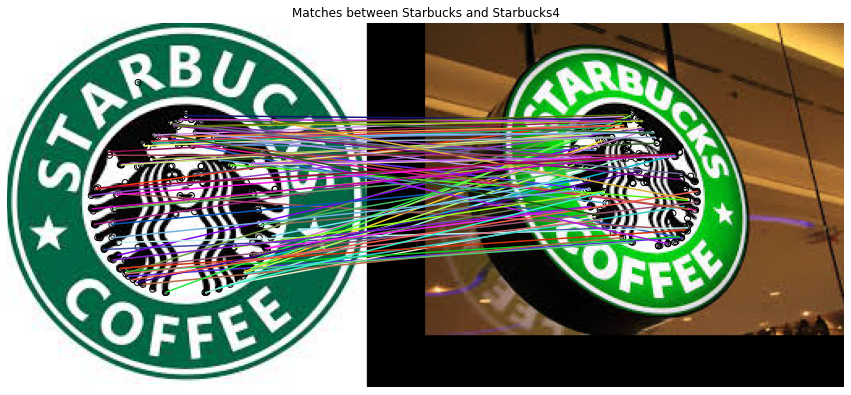

In [ ]:
## Plotting the matches
plt.figure(figsize=(15, 15))
feature.plot_matches(plt, starbucks, starbucks4, keypoints1=matches[0], keypoints2=matches[1], matches=matches[2])
plt.axis('off')
plt.title("Matches between Starbucks and Starbucks4")
plt.show()

### Exercise: #3

*   Using "starbucks.jpg" image as a model, show its matches to all Starbucks images. 
*   Show the number of the matches for the pair as title for each plot.

In [ ]:
# Loading each image
starbucks 
starbucks2 = io.imread("/content/drive/MyDrive/CV/CV_lab5/P05_18_oct_2022_corner_detection_and_ORB/images/starbucks/starbucks2.png")  
starbucks4 
starbucks5 = io.imread("/content/drive/MyDrive/CV/CV_lab5/P05_18_oct_2022_corner_detection_and_ORB/images/starbucks/starbucks5.png")
starbucks6 = io.imread("/content/drive/MyDrive/CV/CV_lab5/P05_18_oct_2022_corner_detection_and_ORB/images/starbucks/starbucks6.jpg") 
starbucksCup = io.imread("/content/drive/MyDrive/CV/CV_lab5/P05_18_oct_2022_corner_detection_and_ORB/images/starbucks/starbucksCup.jpg")#cup 

## Converting image starbucks2 from RGBA to RGB
starbucks2 = color.rgba2rgb(starbucks2)

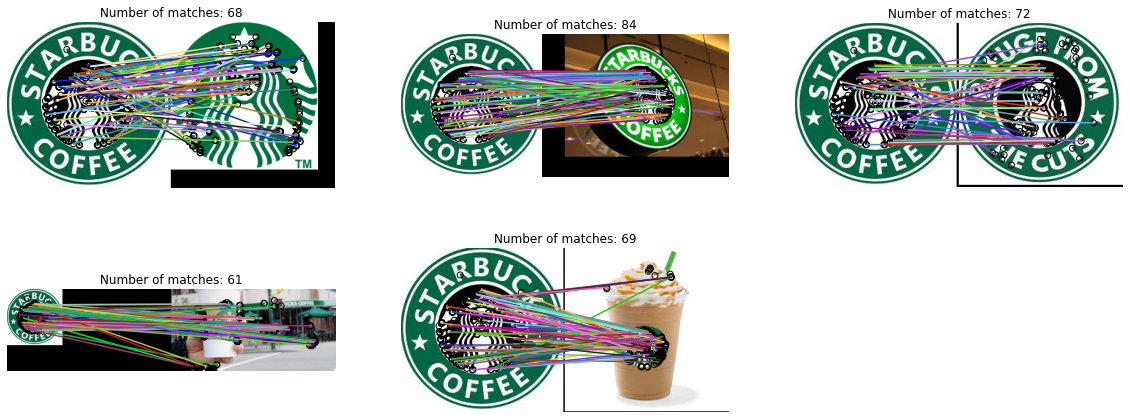

In [ ]:
# ORB for each image

#### titles = ["Starbucks vs Starbucks2", "Starbucks vs Starbucks4", "Starbucks vs Starbucks5", "Starbucks vs Starbucks6", "Starbucks vs StarbucksCup"]

## creating a list of images 
starbucks_logos = [starbucks2, starbucks4, starbucks5, starbucks6, starbucksCup]


plt.figure(figsize=(20, 20))

row = 1
for image in starbucks_logos:
    k1, k2, m12 = get_ORB(starbucks,image,n_scales=8, n_keypoints=200, fast_n=9, fast_threshold=0.08, harris_k=0.04)

    plt.subplot(5,3,row)
    plt.axis("off")
    plt.title("Number of matches: "+str(len(m12)))
    feature.plot_matches(plt, starbucks, image, k1, k2, m12)

    row +=1 


*   Comment on the performance of the algorithm with respect to each image. When do you think the algorithm works better?

**Solution**

The algorithm will evidently find more matches the more similar the images are. Neverhteless, it found less images when matching pictures with a background. 

To do the matching, ORB uses Fast algorithm to detect and BRIEF to match. To match the images, BRIEF classifies image patches based on intensities, and it does it at pixel level. Thus if in the background a color of similar intensity appears, it will match them. Indeed, as BRIEF deals with the images at pixel level, it is very noise sensitive. Thus is FAST and BRIEF detect the same arangement of pixels in 2 different images, it will match them. [7](https://medium.com/data-breach/introduction-to-brief-binary-robust-independent-elementary-features-436f4a31a0e6)

### Exercise: #4

*   Repeate **Exercise #2**, by changing the orientation of the model image by rotating it and comparing it with its original version.
*   Create 8 orientations of the model image by rotating the image by 45&deg; (0, 45, 90, 135, 180, 225, 270, 315). *Hint: You can use the rotate() function from skimage.transform.*

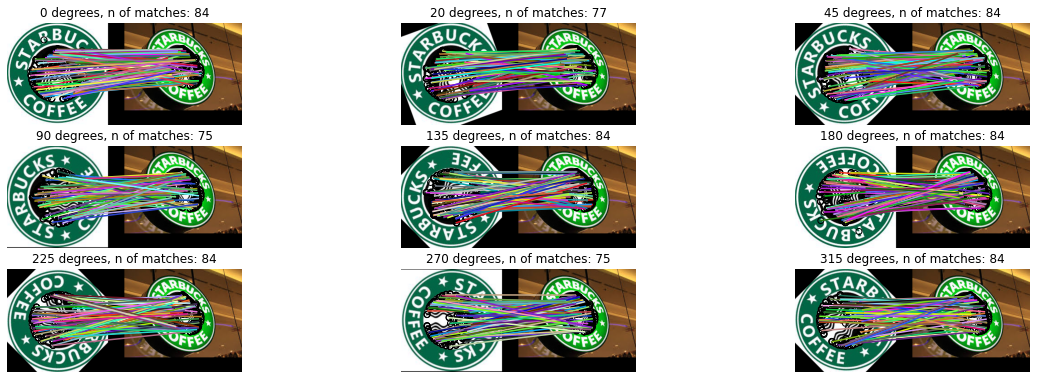

In [ ]:
angles = [0,20,45,90,135,180,225,270,315]
titles = ["0 degrees, n of matches: ", "20 degrees, n of matches: ", "45 degrees, n of matches: ", "90 degrees, n of matches: ", "135 degrees, n of matches: ", "180 degrees, n of matches: ", "225 degrees, n of matches: ", "270 degrees, n of matches: ", "315 degrees, n of matches: "]

plt.figure(figsize=(20, 20))

row = 1
for ang, tlt in zip(angles,titles):
  starbucks_ang = transform.rotate(starbucks, ang)
  k1, k2, m12 = get_ORB(starbucks_ang, starbucks4, n_scales=8, n_keypoints=200, fast_n=9, fast_threshold=0.08, harris_k=0.04)

  plt.subplot(9,3,row)
  plt.axis("off")
  plt.title(tlt+str(len(m12)))
  feature.plot_matches(plt, starbucks_ang, starbucks4, k1, k2, m12)

  row +=1 

*   What do you observe with respect to the change in orientations?

**Solution**

There is nearly no change, ORB is almost rotation invariant. The number of matches decreases only at 20, 90 and 270 degrees.
[8](https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf)

### Exercise: #5

*   Repeat **Exercise #3** using Coco-cola images using cocacola_logo.png as the model image.
*   Does the same parameters used for Starbucks images work in this case? Or was it necessary to modify the ORB parameters?

In [ ]:
# solution
# Load Coca-cola images
cocacola_logo = io.imread("/content/drive/MyDrive/CV/CV_lab5/P05_18_oct_2022_corner_detection_and_ORB/images/cocacola/cocacola_logo.png")
cocacola1 = io.imread("/content/drive/MyDrive/CV/CV_lab5/P05_18_oct_2022_corner_detection_and_ORB/images/cocacola/cocacola1.jpg")
cocacola2 = io.imread("/content/drive/MyDrive/CV/CV_lab5/P05_18_oct_2022_corner_detection_and_ORB/images/cocacola/cocacola2.png")
cocacola3 = io.imread("/content/drive/MyDrive/CV/CV_lab5/P05_18_oct_2022_corner_detection_and_ORB/images/cocacola/cocacola3.jpg")
cocacola4 = io.imread("/content/drive/MyDrive/CV/CV_lab5/P05_18_oct_2022_corner_detection_and_ORB/images/cocacola/cocacola4.jpg")
cocacola5 = io.imread("/content/drive/MyDrive/CV/CV_lab5/P05_18_oct_2022_corner_detection_and_ORB/images/cocacola/cocacola5.png")
cocacola6 = io.imread("/content/drive/MyDrive/CV/CV_lab5/P05_18_oct_2022_corner_detection_and_ORB/images/cocacola/cocacola6.jpg")

## Converting from RGBA to RGB: cocacola_logo, cocacola2, cocacola5
cocacola_logo = color.rgba2rgb(cocacola_logo)
cocacola2 = color.rgba2rgb(cocacola2)
cocacola5 = color.rgba2rgb(cocacola5)


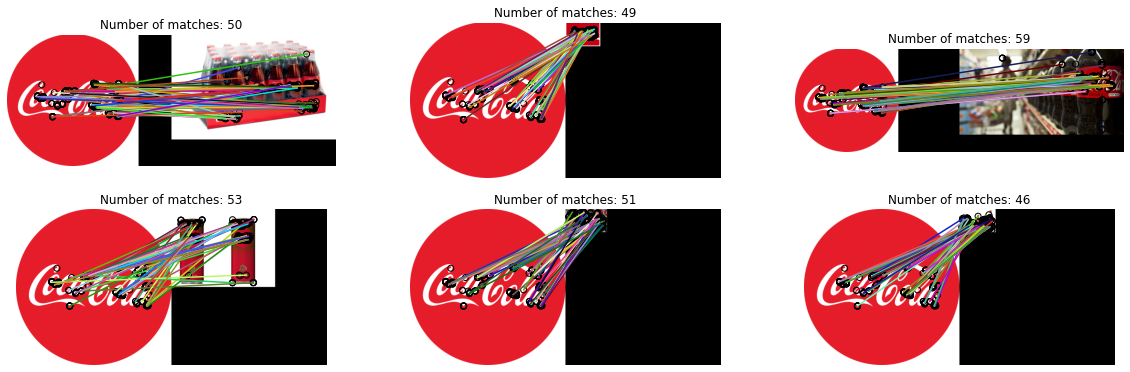

In [ ]:
cocacolas = [cocacola1, cocacola2, cocacola3, cocacola4, cocacola5, cocacola6]

### titles = ["CocaCola vs CocaCola1", "CocaCola vs CocaCola2", "CocaCola vs CocaCola3", "CocaCola vs CocaCola4", "CocaCola vs CocaCola5", "CocaCola vs CocaCola6"]

plt.figure(figsize=(20, 20))

row = 1
for coke in cocacolas:
    k1, k2, m12 = get_ORB(cocacola_logo,coke, n_scales=8, n_keypoints=200, fast_n=9, fast_threshold=0.001, harris_k=0.1)

    plt.subplot(6,3,row)
    plt.axis("off")
    plt.title("Number of matches: "+str(len(m12)))
    feature.plot_matches(plt, cocacola_logo, coke, k1, k2, m12)

    row +=1 


**Does the same parameters used for Starbucks images work in this case? Or was it necessary to modify the ORB parameters?**

**Solution**

The same parameters used for Starbucks images do NOT work in this case. It was necessary to modify the ORB parameters (*from, to*):
*   n_scales: 8
*   n_keypoints: 200
*   fast_n: 9
*   fast_threshold: 0.08 *to* 0.001 (decrease for more corners)
*   harris_k: 0.04 *to* 0.1 (smaller values detect more sharp corners)

By changing the decreasing FAST threshold and increasing harris *k* parameter we could detect more corners and be less sentitive to sharp corners. 


### Exercise #6. Analysis of the applied techniques and results

*   What are the advantages of ORB object detection compared with HOG object detector?

**Solution**

ORB object detection is (nearly) rotation and scale invariant whereas HOG is not rotation or scale invariant. ORB can better detect local features whereas HOG is used to extract global features. 

*   What would happen if you analyse an image that does not contain the Starbucks logo (as is the case of "edificio.jpg")?

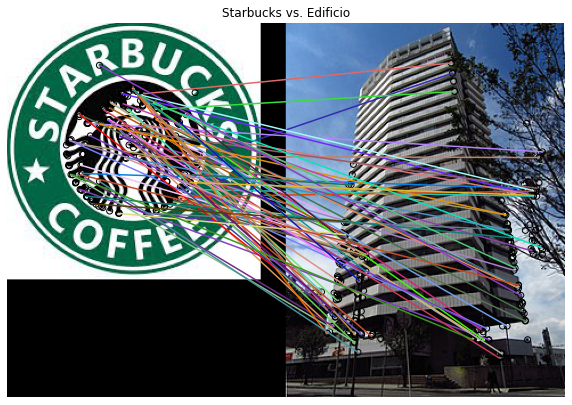

In [ ]:
# solution
# Loading images
edificio = io.imread("/content/drive/MyDrive/CV/CV_lab5/P05_18_oct_2022_corner_detection_and_ORB/images/edificio.jpg")

# Matching starbucks and edifio images
matchesSE = get_ORB(starbucks,edificio, n_scales=8, n_keypoints=200, fast_n=9, fast_threshold=0.08, harris_k=0.04)

## Plotting the matches
plt.figure(figsize=(10, 10))
feature.plot_matches(plt, starbucks, edificio, keypoints1=matchesSE[0], keypoints2=matchesSE[1], matches=matchesSE[2])
plt.axis('off')
plt.title("Starbucks vs. Edificio")
plt.show()

**Solution**

ORB will look for similar descriptors, for both images and will look for matches. Corners and edges that present similar descriptors will be matched, independently of their "global" shape. 

*   What are the different ways of defining a quality measure for the correspondance between two images? (implementation of measures is not necessary)?

**Solution**

There is no quality measure in ORB. Nevertheless we could use Harris "cornerness" score using any of the following functions:
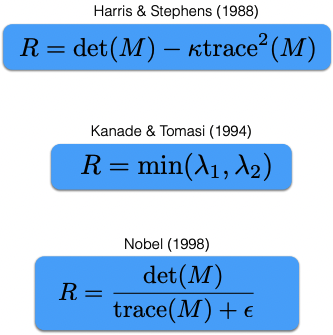

Where:
*   R if the function (Harris Response calculation)
*   M is the matrix computed from image derivatives (structure tensor/second-moment matrix), which comes the differences between two image patches during the Harris algorithm
*   R if the function (Harris Response calculation)
*   $λ are the eigenvalues computed from M

[9](https://www.cs.cmu.edu/~16385/s17/Slides/6.2_Harris_Corner_Detector.pdf)



# Panorama Stitching (Not graded)

Image Mosaicing is a technique of combining multiple overlapping images into a single image.

*   A simple tutorial can be found in this notebook: 
*   https://github.com/scikit-image/skimage-tutorials/blob/main/lectures/solutions/adv3_panorama-stitching-solution.ipynb


---

## **End of P2_2: Corner Detection and ORB**
Deadline for P2_2 submission in CampusVirtual is: **Thursday, the 27th of October, 2022**
